# Molecular Docking Preparation – Visual Summary

This notebook:
- Prepares a few example ligands for docking
- Generates multiple 3D conformers
- Calculates conformer energies
- Visualises:
  - Energy distribution for each molecule
  - Lowest-energy conformer per molecule
  - Number of conformers generated per molecule


In [1]:
from molecular_docking_prep import MolecularDockingPrep
from rdkit import Chem
import pandas as pd

prep = MolecularDockingPrep()

# Example ligands (you can change or add more)
examples = {
    'Aspirin': 'CC(=O)Oc1ccccc1C(=O)O',
    'Ibuprofen': 'CC(C)Cc1ccc(cc1)C(C)C(=O)O',
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
}

rows = []

for name, smi in examples.items():
    print(f"Preparing {name}...")
    mol = prep.prepare_ligand(smi)
    if mol is None:
        continue

    # Generate conformers
    n_conf = prep.generate_conformers(mol, num_conformers=10)
    print(f"  Conformers: {n_conf}")
    if n_conf == 0:
        continue

    # Energies
    energies = prep.calculate_conformer_energies(mol)

    for conf_id, e in zip(range(len(energies)), energies):
        rows.append({
            "Molecule": name,
            "ConformerID": conf_id,
            "Energy": e
        })

df_conf = pd.DataFrame(rows)
df_conf


Preparing Aspirin...
  Conformers: 2
Preparing Ibuprofen...
  Conformers: 6
Preparing Caffeine...
  Conformers: 1


,Molecule,ConformerID,Energy
0,Aspirin,0,20.833145
1,Aspirin,1,20.833145
2,Ibuprofen,0,24.342160
3,Ibuprofen,1,24.737706
4,Ibuprofen,2,24.615822
5,Ibuprofen,3,24.732876
6,Ibuprofen,4,24.732334
7,Ibuprofen,5,24.736945
8,Caffeine,0,-122.528411


## Docking Preparation Visuals

We will plot:

1. **Energy distribution per molecule**  
   - Shows how stable the different conformers are.

2. **Lowest energy per molecule**  
   - The best (most stable) conformer for each molecule.

3. **Number of conformers per molecule**  
   - How many 3D shapes we successfully generated.


<Figure size 640x480 with 0 Axes>

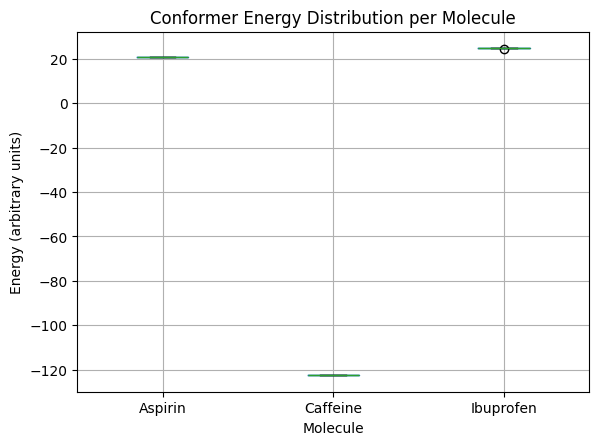

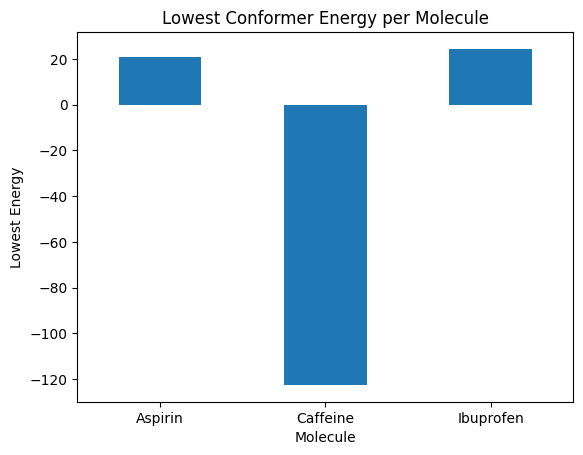

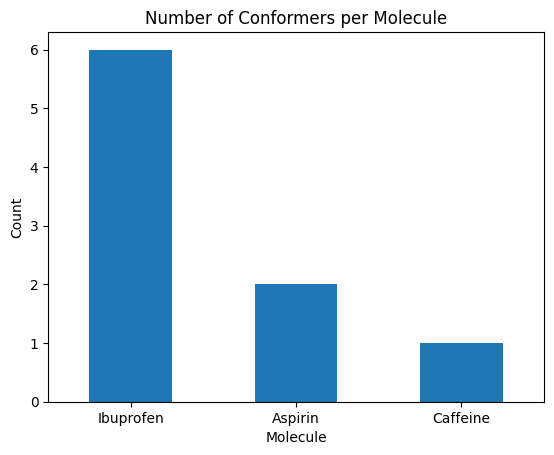

In [2]:
import matplotlib.pyplot as plt

# 1) Energy distribution per molecule (boxplot)
plt.figure()
df_conf.boxplot(column="Energy", by="Molecule")
plt.title("Conformer Energy Distribution per Molecule")
plt.suptitle("")  # remove automatic extra title
plt.xlabel("Molecule")
plt.ylabel("Energy (arbitrary units)")
plt.xticks(rotation=0)
plt.show()

# 2) Lowest-energy conformer per molecule (bar chart)
lowest = df_conf.groupby("Molecule")["Energy"].min()

plt.figure()
lowest.plot(kind="bar")
plt.title("Lowest Conformer Energy per Molecule")
plt.xlabel("Molecule")
plt.ylabel("Lowest Energy")
plt.xticks(rotation=0)
plt.show()

# 3) Number of conformers per molecule (bar chart)
counts = df_conf["Molecule"].value_counts()

plt.figure()
counts.plot(kind="bar")
plt.title("Number of Conformers per Molecule")
plt.xlabel("Molecule")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
